**DMML ASSIGNMENT 1 - SHANKAR RAM V (MCS202114)

**1. IMPORTING NECESSARY PACKAGES

In [1]:
!pip install imblearn

In [72]:
import numpy as np
import os
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

**2. READING AND MODIFYING THE DATASET

In [73]:
data = pd.read_csv('bank-additional-full.csv', sep = ';')

#print(data['y'].value_counts())

data.drop(['duration'], axis = 1,inplace = True)
data.drop(['month'], axis = 1, inplace = True)
data.drop(['day_of_week'], axis = 1, inplace = True)
data.drop(['contact'], axis = 1, inplace = True)
data.drop(['campaign'], axis = 1, inplace = True)

#Changing categorical attributes to numerical attributes using Label Encoding.
categorical_cols = ['job', 'marital', 'education', 'default', 'poutcome', 'housing', 'default', 'loan']
data = pd.get_dummies(data, columns = categorical_cols, drop_first = True)

X = data.drop(['y'], axis = 1)
y = data['y']

feature_names = X.columns

#Splitting the data into training and test samples (Default 75-25 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

oversample = SMOTE()
X_train, y_train = oversample.fit_resample(np.array(X_train), np.array(y_train))

**3. FITTING A DECISION TREE CLASSIFIER TO THIS DATA

In [74]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(max_depth = 3, max_leaf_nodes = 16, random_state=42)
DT.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=16, random_state=42)

In [75]:
y_pred = DT.predict(X_test)
y_test = np.array(y_test).flatten()

print(classification_report(y_test, y_pred))

/home/h1lo/Downloads/yes/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

          no       0.94      0.87      0.90      9144
         yes       0.35      0.58      0.44      1153

    accuracy                           0.83     10297
   macro avg       0.65      0.72      0.67     10297
weighted avg       0.88      0.83      0.85     10297



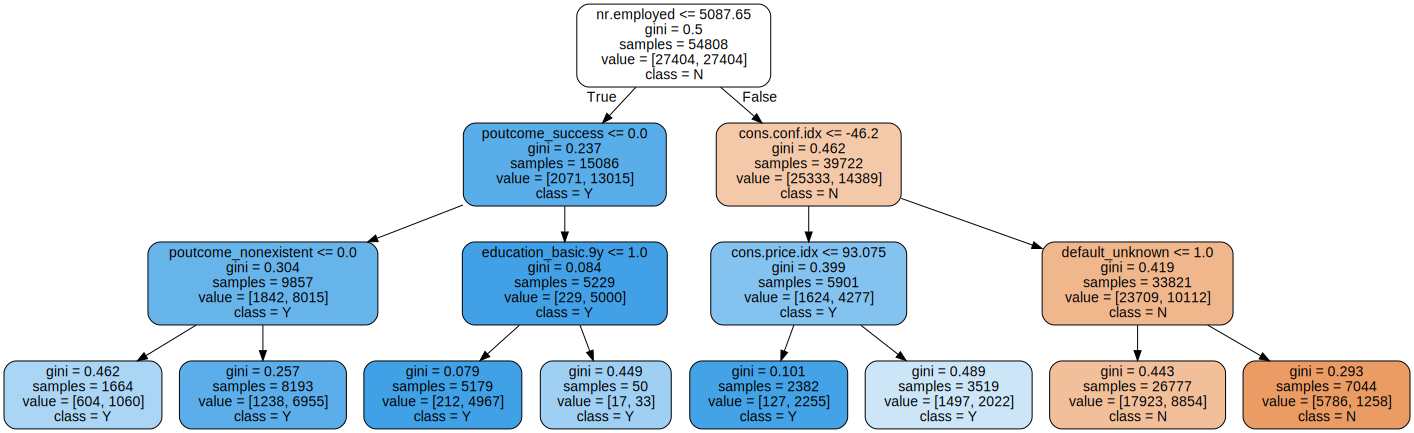

In [76]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        DT,
        out_file=os.path.join(IMAGES_PATH, "BM_tree.dot"),
        feature_names=feature_names,
        class_names=['N','Y'],
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "BM_tree.dot"))

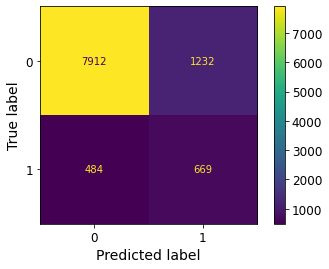

In [77]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

**4. FITTING A RANDOM FOREST CLASSIFIER AND A BAGGING MODEL TO THIS DATA

In [78]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 125, max_leaf_nodes = 16, random_state = 42)

rf.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=125, random_state=42)

In [79]:
y_pred = rf.predict(X_test)
y_test = np.array(y_test).flatten()

print(classification_report(y_test, y_pred))

/home/h1lo/Downloads/yes/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

          no       0.94      0.88      0.91      9144
         yes       0.38      0.58      0.46      1153

    accuracy                           0.85     10297
   macro avg       0.66      0.73      0.68     10297
weighted avg       0.88      0.85      0.86     10297



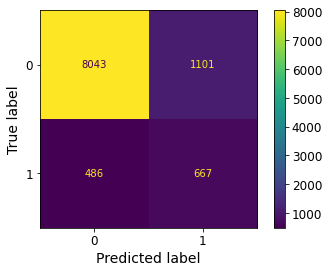

In [80]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [94]:
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=150,
    max_samples=120, bootstrap=True, random_state=42)
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  max_samples=120, n_estimators=150, random_state=42)

In [95]:
y_pred = bag_clf.predict(X_test)
y_test = np.array(y_test).flatten()

print(classification_report(y_test, y_pred))

/home/h1lo/Downloads/yes/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but BaggingClassifier was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

          no       0.94      0.89      0.91      9144
         yes       0.39      0.57      0.46      1153

    accuracy                           0.85     10297
   macro avg       0.67      0.73      0.69     10297
weighted avg       0.88      0.85      0.86     10297



*The Random Forest and Bagging models have similar accuracy on this data set

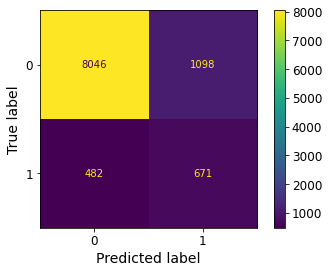

In [83]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

**5. FITTING A NAIVE BAYES CLASSIFIER TO THIS DATA (W/ LAPLACIAN SMOOTHING)

In [84]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
NB.fit(X_train, y_train)

GaussianNB()

In [85]:
y_pred = NB.predict(X_test)
y_test = np.array(y_test).flatten()

print(classification_report(y_test, y_pred))

/home/h1lo/Downloads/yes/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

          no       0.94      0.79      0.86      9144
         yes       0.27      0.60      0.37      1153

    accuracy                           0.77     10297
   macro avg       0.60      0.70      0.62     10297
weighted avg       0.86      0.77      0.81     10297



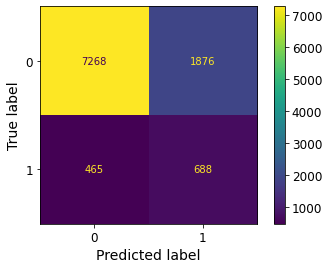

In [86]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

**6. BOOSTING THE NAIVE BAYES CLASSIFIER

In [110]:
from sklearn.ensemble import AdaBoostClassifier

ada_nb = AdaBoostClassifier(
    GaussianNB(), n_estimators = 100, 
    algorithm="SAMME.R", learning_rate=0.2, random_state=42)
ada_nb.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=GaussianNB(), learning_rate=0.2,
                   n_estimators=100, random_state=42)

In [111]:
y_pred = ada_nb.predict(X_test)
y_test = np.array(y_test).flatten()

print(classification_report(y_test, y_pred))

/home/h1lo/Downloads/yes/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

          no       0.92      0.83      0.88      9144
         yes       0.26      0.46      0.33      1153

    accuracy                           0.79     10297
   macro avg       0.59      0.65      0.60     10297
weighted avg       0.85      0.79      0.81     10297



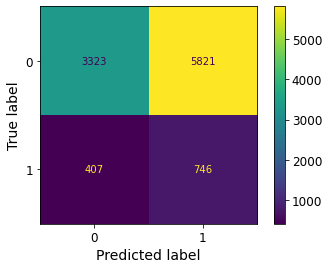

In [103]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()